In [348]:
import csv
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

In [349]:
data = pd.read_csv("standardized.csv")

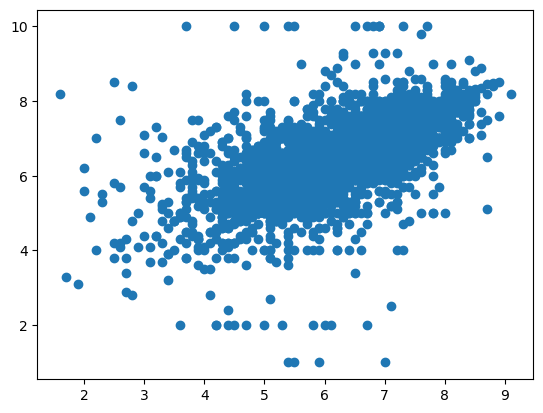

In [350]:
plt.scatter(x = data["imdb_score"], y = data["tmdb_score"])
plt.show()

In [351]:
def regression(missingValue, predictedValue, file):
    data = pd.read_csv(file)

    missing_data = data[data[missingValue].isnull() & ~data[predictedValue].isnull()]
    non_missing_data = data.dropna(subset = [missingValue, predictedValue])
    train_data, test_data = train_test_split(non_missing_data, test_size = 0.3, random_state = 42)

    x_train = train_data[[missingValue]]
    y_train = train_data[[predictedValue]]

    linear_model = LinearRegression()
    linear_model.fit(y_train, x_train)


    x_test = test_data[[predictedValue]]
    predicted = linear_model.predict(x_test)
    mse = mean_squared_error(test_data[missingValue], predicted)
    print("Mean Squared Error on Test Data: ", mse)

    predicted = linear_model.predict(missing_data[[predictedValue]])
    data.loc[missing_data.index, missingValue] = predicted

    data[missingValue] = data[missingValue].round(1)
    data.to_csv("score_processing.csv", index = False)



In [352]:
regression("imdb_score", "tmdb_score", "standardized.csv")
regression("tmdb_score", "imdb_score", "score_processing.csv")

data = pd.read_csv("score_processing.csv")
data = data.dropna(subset = ["imdb_score", "tmdb_score"])
data["weighted_avarage_score"] = 0.5 * data["imdb_score"] + 0.5 * data["tmdb_score"]
data["weighted_avarage_score"] = data["weighted_avarage_score"].round(1)
data.to_csv("score.csv", index = False)

data = pd.read_csv("score.csv")
data[["weighted_avarage_score", "weighted_average_popularity"]].to_csv("score.csv", index = False)

Mean Squared Error on Test Data:  0.8430252769082709
Mean Squared Error on Test Data:  0.6563321265687443


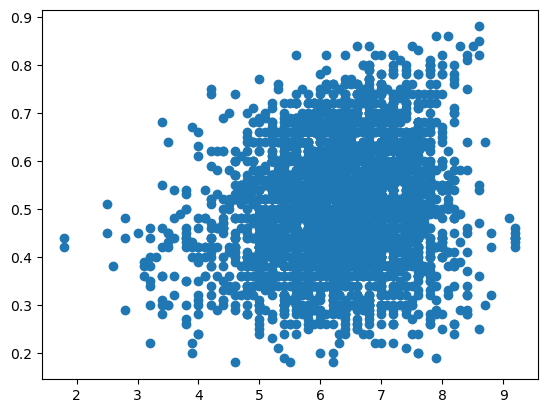

In [353]:
data = pd.read_csv("score.csv")
plt.scatter(x = data["weighted_avarage_score"], y = data["weighted_average_popularity"])
plt.show()

In [354]:
data = pd.read_csv("score.csv")
data["range1"] = pd.cut(data["weighted_avarage_score"], bins = [0, 5, 10], labels = ['<=5', '>5'])
data["range2"] = pd.cut(data["weighted_average_popularity"], bins = [0, 0.5, 1], labels = ['<=0.5', '>0.5'])

# print(data[["range1", "range2"]].head(20))

score = data[["range1"]]
popularity = data["range2"]
mi = mutual_info_classif(X= score, y = popularity, discrete_features=True)

print(mi)

[0.00593786]


The data for mutual information is quite low, so the correlation between scores and likability is small